# ESC190 Midterm Review



This midterm will cover material up to and including linked lists, stacks, and queues.

This means that there are the following main topics to cover:
1) `c` syntax and conventions
2) Runtime complexity analysis
3) Compiling and running code; valgrind use, basic file system concepts, etc.
4) Strings and `c` arrays
5) Dynamic memory management with `malloc`
6) Pointers & structs
7) Linked lists, stacks, and queues

You can find my previous tutorial material [here](../esc190_tutorial-1.ipynb) which covers `c` syntax and conventions, runtime complexity analysis, strings, `malloc`, and basic pointers.  

This tutorial will largely focus on applications of linkedlists, stacks, and queues in a way similar to what may be found on the exam (and as you have seen on your assignments thus far).
As I cannot be assed to write up yet another linkedlist/stack/queue implementation tutorial (there are *at least* a hundred thousand of them online) I will defer you to the lecture note and Google and just field questions about them instead. 
I have taken the provided example code and refactored them so that you can `include` them and play around with it a bit in this notebook -- examples are given below.


If time permits I will do a demo with `ddd`: data-display debugger to show how we can visualize linked lists and the `c` memory model.


> As a side note I encourage you to make sure you *understand* how compliling a program works and what the flags we pass to the compiler do. 
> The following will be left as an exercise to the reader
> 1. What does `-W` mean? What about `-Wall` or `-Wpedantic`?
> 2. What about `-g`?
> 3. What about `-O`? `-O1`?
> 4. What are object files (`.o`) and what are they good for?


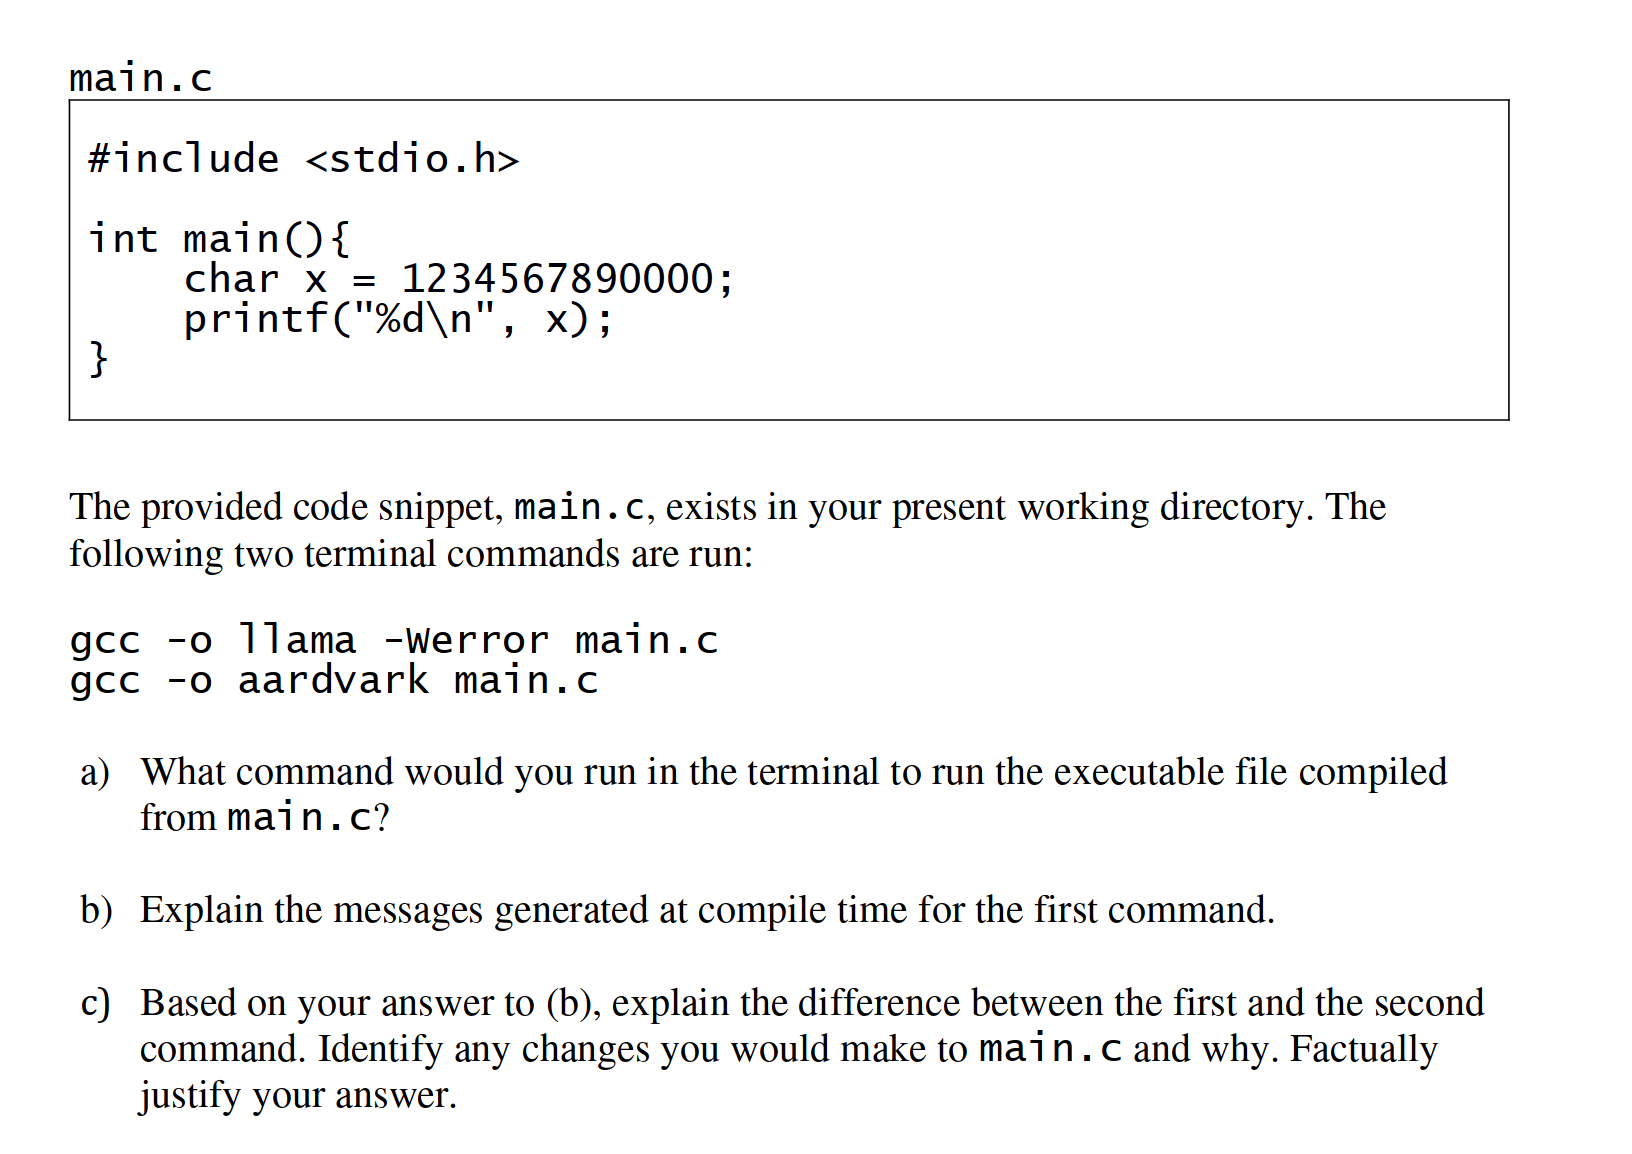
^^ From ESC190 2020 Final Exam

> Walk through and run the code


## Things you should be comfortable with
- Reading `c` declarations and code; what header/source files are. 
    - [Spiral Rule](http://c-faq.com/decl/spiral.anderson.html) [more info](http://unixwiz.net/techtips/reading-cdecl.html)
- Drawing memory models
    - Arrays are *contigous* blocks of memory, and so are structs
    - Elements are usu. *word-aligned*
- Accessing struct elements; from behind a pointer and not
- Sorting a linked list by an arbritrary key
- Runtime complexities of common linked list/stack/queue operations
- Working with nested structs (do your assignment/project 1!)
- Know common memory errors
    - Invalid read, segfault, etc.
    - For every `malloc` or `calloc` there must be a corresponding `free`
- Reading/Writing from files


## Other notes
- Don't forget your semicolons!
    - We won't be docking tons of marks for this but it would help you keep a half-mark or two which can add up.
- Judgining by the past midterms they seem fairly straightforward -- just *know* know the basics well. Right now we're just building the foundational skills. 


# Pointers, Pointers, Pointers!
You should already have an understanding of what pointers are; variables that store a memory address that "point" to a memory location.
But it can get a little confusing when you have to deal with *pointer-pointers* and indirection and all of that fun.


- Why pointers?
   - Minimize memory copies
   - Mutating variables 
   - Elegant way to represent some data structures
   
   
`c` functions are pass-by-copy. So in order to mutate a variable that we pass to a function, we must use pointers.

> Intuition: by passing a pointer, which is the memory location of the variable in question, we copy the pointer instead of the block of memory in which the variable is stored so that we can mutate it.


In [ ]:
#include <stdio.h>

void foo (int x) {
    x = 10;
}

void bar (int* y) {
    *y = 10;
}

int main () {
    int i = 0;
    foo(i);
    printf("i is %d\n", i);
    bar(&i);
    printf("i is %d\n", i);
    // i is still 0
}



TLDR:

- Use single pointers when you:
    1. Want to avoid unnecessary memory copies
    2. Want to mutate the function argument
- Use pointer pointers when there is a chance that the pointer value itself may changed. This will primarily occur if:
    1. There could be a realloc
    2. You are trying to point it to a different block of memory
    3. You are `free`-ing memory and need to set the pointer to `NULL`


## Memory issues

> With great power comes great responsiblity    - Somebody in spiderman

At the minimum, know what the following are and what causes them
- Invalid read
    - Reading data you are not allocated
- Segmentation faults
    - Trying to illegally access memory
- Memory leak
    - Forgetting to free memory

For more, see:
- https://en.wikipedia.org/wiki/Segmentation_fault
- https://student.cs.uwaterloo.ca/~cs241/valgrind/
- http://scottmcpeak.com/memory-errors/
- https://web.stanford.edu/class/archive/cs/cs107/cs107.1222/resources/valgrind.html


## Misc

One thing I've heard asked is what stacks are good for. 

![img from enjoyalgorithms](https://cdn-images-1.medium.com/max/600/1*KmVggtKbQtxyWBeOr8Ks3w.png)

A neat feature of stacks is that they're really good at representing recursion, e.g. the factorial above, or checking for balanced parantheses as we did in ESC180



![https://www.google.com/url?sa=i&url=http%3A%2F%2Fme.shizuku.com%2Fcoding%2Falgorithms%2Fdynamic-programing-algorithms%2Flongest-valid-parentheses%2F&psig=AOvVaw301PdFtiLDp_2jXv1woDFD&ust=1646283545582000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCIiBwKHSpvYCFQAAAAAdAAAAABAJ](https://s3-us-west-2.amazonaws.com/me.shizuku.com/wp-content/uploads/2017/05/11184907/longest_valid_parentheses_stack.gif)

In [ ]:
// 2021 Midterm (Guerzhoy)
// Solutions by me and I think they passed all the test cases
// but I also wouldn't be suprised if I made a silly error somewhere
#include <stdio.h>
#include <stdbool.h>
// convert a well-formed string float into a float
double my_atof(char *str);


int main() {
    printf("the length of 'hello world\\n' is: %d\n", my_strlen("hello world\n"));
    printf("5 ^ -2 = %f\n", my_neg_pow(5.0, 5));
    printf("%f\n", my_atof("-123.4"));
    printf("%f\n", my_atof("-32.1"));
    printf("%f\n", my_atof("32.1"));

}

In [ ]:
// 2021 midterm (Guerzhoy)
// Write a recursive version of strncmp 
//    Return values:
//    <0	the first character that does not match has a lower value in str1 than in str2
//     0 	the contents of both strings are equal
//    >0	the first character that does not match has a greater value in str1 than in str2

#include <stdio.h>

int my_strncmp(char* str1, char* str2, int num);


int main() {
    printf("%d\n", my_strncmp("180", "190", 3));
    printf("%d\n", my_strncmp("0", "000", 5));
    printf("%d\n", my_strncmp("ESC180", "ESC190", 5));
    printf("%d\n", my_strncmp("bunzilla", "bunny", 5));
    printf("%d\n", my_strncmp("ESC180", "ESC180", 5));
}



In [ ]:
// 2021 midterm (Guerzhoy)

// Implement a data structure stores a set of integers (and maintains set property) 
// with a linked list "backend".
// Methods to implement are given in intset.h

#include "/home/jovyan/ESC190/midterm_review/intset.h"
#include <stdio.h>
#include <stdlib.h>

struct node* newNode(int val);
void intset_create(struct intset **s);
void ll_append(struct intset* s, int elem);
int intset_iselem(struct intset *s, int elem);
void intset_remove(struct intset *s, int elem)l
void intset_union(struct intset *s1, struct intset *s2, struct intset **s3);
void intset_add(struct intset *s, int *elems, int num_elems);


void print_loop(struct node* head) {
    if (head == NULL)  {
    }
    while (head != NULL) {
        printf("%d, ", head->data);
        head=head->next;
    }
    printf("\n");
}



int main(void)
{
    printf("Test code for intset\n");
    struct intset *s1;
    struct intset *s2;
    struct intset *s3;
    intset_create(&s1);
    intset_create(&s2);
    /* // Add the elements 5, 4, 4, 10, 4 to s1 */
    int to_addA[5] = {5, 4, 4, 10, 4};
    int to_addB[5] = {2, 2, 3, 4, 10};
    int to_addC[2] = {10, 12};
    
    intset_add(s1, to_addA, 5); // Add the 5 elements from to_addA to the set s1.
                                // Ignore repetitions
    
    print_loop(s1->head);
    
    intset_add(s1, to_addC, 2); // Add the 2 elements from to_add
                                // Ignore repetitions
    
    intset_add(s2, to_addB, 5); // Add 2, 2, and 3 to s2. Ignore repetitions.

    print_loop(s1->head);
    print_loop(s2->head);

    printf("union");
    intset_union(s1, s2, &s3); // Compute the union of the sets
    /*                                   // s1 and s2, and put the result in s3 */

    print_loop(s3->head);


    printf("Is 2 in s1? %d\n", intset_iselem(s1, 2)); // 0
    printf("Is 3 in s2? %d\n", intset_iselem(s2, 3)); // 1
    printf("Is 4 in s3? %d\n", intset_iselem(s3, 4)); // 1

    intset_remove(s1, 4);      // Remove the element 4 for the set
    intset_remove(s1, 5);      // Remove the element 4 for the set
    intset_remove(s1, 10);      // Remove the element 4 for the set
    print_loop(s1->head);
    printf("postremove: Is 4 in s1? %d\n", intset_iselem(s1, 4)); // 0

}






In [ ]:
// 2020 Midterm Q6: write a function that takes a string containing any 
// characters and converts all upper case characters to lowercase

#include <stdio.h>
void lower_case(char line[]);



// 2020 Q6, cont'd: write a function that takes a function pointer to a function
// that will modify a string in-place before writing it to a given file ptr
void write_line(FILE *stream, char file_line[], void (*fn)(char line[]));

int main () {
    
    char string[] = "HELLO WoRLD!!\n";
    
    printf("Before lowercase: %s", string);
    lower_case(string);
    printf("After lowercase: %s", string);
    
    char string2[] = "helLo wOrLd!\n";
    
    FILE *out = fopen("2020_q6_out.txt", "w+"); // Question: What does "w+" mean?
    
    write_line(out, string2, &lower_case);
    
    return 0;
}

In [36]:
// 2020 Midterm Q5: implement a 2D dynamic array with methods to create, resize, and delete it
#include <stdio.h>
#include <stdlib.h>

/* 
    create_array will instanstiate an array of fixed size num_rows but with dynamic columns of length num_cols
*/
int** create_array(int num_rows, int num_cols[]);
void resize_array(int num_rows, int num_cols[], int **dyn_arr);
void delete_array(int num_rows, int **dyn_arr);


#define NUM_ROWS 3
int main(void){
    //**Insert code below**
    int num_cols [] = {5, 5, 5};
    int **dyn_arr = create_array(NUM_ROWS, num_cols);
    resize_array(NUM_ROWS, num_cols, dyn_arr);
    delete_array(NUM_ROWS, dyn_arr);
    return 0;
}



# Examples below

In [2]:
// It seems that a full path is required with the jupyter `c` kernel
// ... I should submit a PR to fix that
#include "/home/jovyan/ESC190/midterm_review/linked_list.h"

void main(){
	int arr[] = {1, 7, 100, 20};
	int n = 4;
	ListNode* head = create_ll(arr, n);
	print_ll(head);
	
	int val = 35;
	int i = 3;
	fprintf(stdout, "Now inserting value %d at index %d...\n", val, i);
	insert(head, i, val);
	print_ll(head);
	
	val = 2000;
	i = 5;
	
	fprintf(stdout, "Now inserting value %d at index %d...\n", val, i);
	insert(head, i, val);
	print_ll(head);
	
	delete_ll(&head);
}











1 7 100 20 
Now inserting value 35 at index 3...
1 7 100 35 20 
asdf 2000...
1 7 100 35 20 2000 


In [20]:

#include "/home/jovyan/ESC190/midterm_review/queue_linked_list.h"



int main(){

    struct qu_node *qhead= NULL;
    struct qu_node *qtail= NULL;

    printf("Enqueue 10 items to the queue: \n");
    char *letters = "!sEDI 3< I";  //10 items, not pushing '\0'
    for(int i=0; i<(int)strlen(letters);i++){
        enqueue(&qhead, &qtail, letters[i]);    
    }
    print_ql(qhead);
    printf("Let's peek: %c\n", peek(qhead));

    printf("Popping 3 items from the queue: \n");
    for(int j=0; j<3;j++){
        printf("%c", dequeue(&qhead, &qtail));    
    }
    printf("\n");
    print_ql(qhead);
    printf("Let's peek: %c\n", peek(qhead));

    printf("Pushing 4 items to the queue: \n");
    enqueue(&qhead, &qtail, '/');    //1 item
    letters = "< I";        //3 items 
    for(int i=0; i<(int)strlen(letters);i++){
        enqueue(&qhead, &qtail, letters[i]);    
    }
    print_ql(qhead);
    printf("Let's peek: %c\n", peek(qhead));

    printf("Popping all items from the queue..\n");
    while(qhead!=NULL){
        dequeue(&qhead, &qtail);
    }
    printf("Extra pop..\n");
    dequeue(&qhead, &qtail);
    printf("Let's peek: %c\n", peek(qhead));

    printf("Done - allocated memory was freed.\n");
    return 0;
}



Enqueue 10 items to the queue: 
Printing the queue: 
!sEDI 3< I
Let's peek: !
Popping 3 items from the queue: 
!sE
Printing the queue: 
DI 3< I
Let's peek: D
Pushing 4 items to the queue: 
Printing the queue: 
DI 3< I/< I
Let's peek: D
Popping all items from the queue..
Extra pop..
no pop!
queue is empty!
Let's peek:  
Done - allocated memory was freed.


A comment on the following: 

Both of these *implement* the stack data structure although with different backend data representations. 
This is an important idea that will come up more and more later on.

In [22]:


#include "/home/jovyan/ESC190/midterm_review/stack_array.h"

int main(){
	StackAsArray* s = initialize_stack(10);
	Person* p;

	p = person_from_info("Zike Mucke", 20);
	push(s, p);
	print_stack(s);
	
	p = person_from_info("Jeve Stobs", 34);
	push(s, p);
	print_stack(s);
		
	p = person_from_info("Mike Bobbb", 55);
	push(s, p);
	print_stack(s);
	
	p = person_from_info("Jerry Chan", 24);
	push(s, p);
	print_stack(s);
	
	while (s->count_el != 0){
		Person* popped = pop(s);
		print_stack(s);
	}

	//exercise: free the memory so that everything runs Valgrind clean
}




1 of 10 elements on the stack
[Zike Mucke Age: 20] ---> TOP OF THE STACK


2 of 10 elements on the stack
[Jeve Stobs Age: 34] ---> TOP OF THE STACK
[Zike Mucke Age: 20] ---> BOTTOM OF THE STACK


3 of 10 elements on the stack
[Mike Bobbb Age: 55] ---> TOP OF THE STACK
 Jeve Stobs Age: 34
[Zike Mucke Age: 20] ---> BOTTOM OF THE STACK


4 of 10 elements on the stack
[Jerry Chan Age: 24] ---> TOP OF THE STACK
 Mike Bobbb Age: 55
 Jeve Stobs Age: 34
[Zike Mucke Age: 20] ---> BOTTOM OF THE STACK


3 of 10 elements on the stack
[Mike Bobbb Age: 55] ---> TOP OF THE STACK
 Jeve Stobs Age: 34
[Zike Mucke Age: 20] ---> BOTTOM OF THE STACK


2 of 10 elements on the stack
[Jeve Stobs Age: 34] ---> TOP OF THE STACK
[Zike Mucke Age: 20] ---> BOTTOM OF THE STACK


1 of 10 elements on the stack
[Zike Mucke Age: 20] ---> TOP OF THE STACK


0 of 10 elements on the stack


In [ ]:

#include "/home/jovyan/ESC190/midterm_review/stack_linked_list.h"

int main(){

	StackAsLinkedList* s = initialize_stack();
	Person* p;

	p = person_from_info("Zike Mucke", 20);
	push(s, p);
	print_stack(s);
	
	p = person_from_info("Jeve Stobs", 34);
	push(s, p);
	print_stack(s);
		
	p = person_from_info("Mike Bobbb", 55);
	push(s, p);
	print_stack(s);
	
	p = person_from_info("Jerry Chan", 24);
	push(s, p);
	print_stack(s);
	
	while (s->top != NULL){
		Person* popped = pop(s);
		print_stack(s);
	}

	//exercise: free the memory so that everything runs Valgrind clean
}


# SOLUTIONS

In [6]:
// 2021 Midterm (Guerzhoy)
// Solutions by me and I think they passed all the test cases
// but I also wouldn't be suprised if I made a silly error somewhere
#include <stdio.h>
#include <stdbool.h>
// convert a well-formed string float into a float
double my_atof(char *str);

int my_strlen(char* str) {
    int c = 0;
    while (str[c] != '\0') {
        c++;
    }
    return c;
}


double my_neg_pow(double val, int pow) {
    // calculates val * (10*-pow)
    for (int i = 0; i < pow; i ++) {
        val = val / 10.0;
    }
    return val;
}

double my_atof(char *str) {
    // assumes input is valid (i.e contains no spaces, etc)
    /*  0 1 2 3 4 5
     * [9 1 2 . 9 8] --> decimal_loc = 3, max = 10**(3-1), min = 10**(3-5)
     * [9 1 2 . ] --> decimal_loc = 3, max = 10**(3-2), min = 10**(3-3)
     * [9 1 2 ] --> decimal_loc = -1, max = 10**len(str)
     *
     */
    double val = 0.0;
    int sizeof_str = my_strlen(str);
    bool negative = false;
    
    if (str[0] == '-')
        negative = true;
    
        
    int decimal_loc = -1;
    for (int i = 0; i < sizeof_str; i ++ ){
        if (str[i] == '.') {
            decimal_loc = i;
        }
    }
    
    

    for (int i = 0; i < sizeof_str; i ++ ){
        if (str[i] == '.' || str[i] == '-') {
            continue;
        } else {
            val = val * 10.0;
            val = val + (double) (str[i]) - '0';
        }
    }
    if (decimal_loc != -1) {
        val = my_neg_pow(val, (int) -1*(decimal_loc - sizeof_str + 1));
    }
    
    if (negative)
        val = val * -1;
    
    return val;

}


int main() {
    printf("the length of 'hello world\\n' is: %d\n", my_strlen("hello world\n"));
    printf("5 ^ -2 = %f\n", my_neg_pow(5.0, 5));
    printf("%f\n", my_atof("-123.4"));
    printf("%f\n", my_atof("-32.1"));
    printf("%f\n", my_atof("32.1"));

}





the length of 'hello world\n' is: 12
5 ^ -2 = 0.000050
-123.400000
-32.100000
32.100000


In [71]:
// 2021 midterm (Guerzhoy)
// Write a recursive version of strncmp 
//    Return values:
//    <0	the first character that does not match has a lower value in str1 than in str2
//     0 	the contents of both strings are equal
//    >0	the first character that does not match has a greater value in str1 than in str2

#include <stdio.h>

int my_strncmp(char* str1, char* str2, int num) {
    // only equal if both strs are of same length (and so terminate at the same time)
    // or if num equals 0
    if ((num == 0) || ((*str1 == '\0') && (*str2 == '\0'))) {
        /* printf("%s, %s\n", str1, str2); */
        return 0; 
    } 
    if (*str1 < *str2) {
        return -1; // does not match has a lower value in str1
    } else if (*str1 > *str2) {
        return 1; // does not match has a greater value in str1
    }
    return my_strncmp(str1 + 1, str2 + 1, num-1);
}


int main() {
    printf("%d\n", my_strncmp("180", "190", 3));
    printf("%d\n", my_strncmp("0", "000", 5));
    printf("%d\n", my_strncmp("ESC180", "ESC190", 5));
    printf("%d\n", my_strncmp("bunzilla", "bunny", 5));
    printf("%d\n", my_strncmp("ESC180", "ESC180", 5));
}



-1
-1
-1
1
0


In [76]:
// 2021 midterm (Guerzhoy)

// Implement a data structure stores a set of integers (and maintains set property) 
// with a linked list "backend".
// Methods to implement are given in intset.h

#include "/home/jovyan/ESC190/midterm_review/intset.h"
#include <stdio.h>
#include <stdlib.h>




void intset_create(struct intset **s) {
    struct intset* ns = (struct intset*)malloc(sizeof(struct intset));
    ns->head = NULL;
    /* ns->head = (struct node*)malloc(sizeof(struct node)); */
    /* ns->head->next = NULL; */
    *s = ns;
}

struct node* newNode(int val) {
    struct node* new_node = (struct node*) malloc(sizeof(struct node));
    new_node->data = val;
    new_node->next = NULL;
    return new_node;
}


void ll_append(struct intset* s, int elem) {
    if (s->head == NULL) {
        s->head = newNode(elem);
        return;
    } 
    struct node* h = s->head;
    while (h->next != NULL) {
        h = h->next;
    }
    h->next = newNode(elem);
}

void intset_add(struct intset *s, int *elems, int num_elems) {
    for (int i = 0; i < num_elems; i++) { 
        if (intset_iselem(s, elems[i]) == 1) {
            /* printf("%d is already in set\n", elems[i]); */
            continue;
        } else {
            /* printf("append here %d\n", elems[i]); */
            ll_append(s, elems[i]);
        } 
    }
}


void print_loop(struct node* head) {
    /* printf("called printloop\n"); */
    if (head == NULL)  {
    }
    while (head != NULL) {
        printf("%d, ", head->data);
        head=head->next;
    }
    printf("\n");
}


int intset_iselem(struct intset *s, int elem) {
    /* printf("called iselem\n"); */
    if (s->head == NULL) {
        return 0;
    }
    struct node* h = s->head;
    while (h->next != NULL){
        if (h->data == elem) {
            return 1;
        }
        h = h->next;
    }
    if (h->data == elem) {
        //janky
        return 1;
    }
    return 0;
}

//Remove element elem from s, of eleme is in s. If the element 
//is not in s, do nothing.
//free memory that's not needed anymore
void intset_remove(struct intset *s, int elem) {
    if (intset_iselem(s, elem) == 0 ){
        return;
    }
    struct node* head = s->head;
    struct node* prev = s->head;

    if (head != NULL && head->data == elem) {
        s->head = head->next;
        free(head);
        return;
    }

    while (head != NULL && head->data != elem) { 
        // iterate to either end of list or when head->data == elem
        prev = head;
        head = head->next;
    } 

    prev->next = head->next;
    free(head);
    return;

}

//Compute the union of sets s1 and s2, and place the
//result in a new intset *s3.
void intset_union(struct intset *s1, struct intset *s2, struct intset **s3) {
    intset_create(s3);
    
    struct node* head = s1->head;

    // super janky, i know...
    
    if (head == NULL)  {
    }
    while (head != NULL) {
        int data[1] = {head->data};
        intset_add(*s3, data,1);
        head=head->next;
    }
    head = s2->head;
    
    if (head == NULL)  {
    }
    while (head != NULL) {
        int data[1] = {head->data};
        intset_add(*s3, data,1);
        head=head->next;
    }

}



int main(void)
{
    printf("Test code for intset\n");
    struct intset *s1;
    struct intset *s2;
    struct intset *s3;
    intset_create(&s1);
    intset_create(&s2);
    /* // Add the elements 5, 4, 4, 10, 4 to s1 */
    int to_addA[5] = {5, 4, 4, 10, 4};
    int to_addB[5] = {2, 2, 3, 4, 10};
    int to_addC[2] = {10, 12};
    
    intset_add(s1, to_addA, 5); // Add the 5 elements from to_addA to the set s1.
                                // Ignore repetitions
    
    print_loop(s1->head);
    
    intset_add(s1, to_addC, 2); // Add the 2 elements from to_add
                                // Ignore repetitions
    
    intset_add(s2, to_addB, 5); // Add 2, 2, and 3 to s2. Ignore repetitions.

    print_loop(s1->head);
    print_loop(s2->head);

    printf("union");
    intset_union(s1, s2, &s3); // Compute the union of the sets
    /*                                   // s1 and s2, and put the result in s3 */

    print_loop(s3->head);


    printf("Is 2 in s1? %d\n", intset_iselem(s1, 2)); // 0
    printf("Is 3 in s2? %d\n", intset_iselem(s2, 3)); // 1
    printf("Is 4 in s3? %d\n", intset_iselem(s3, 4)); // 1

    intset_remove(s1, 4);      // Remove the element 4 for the set
    intset_remove(s1, 5);      // Remove the element 4 for the set
    intset_remove(s1, 10);      // Remove the element 4 for the set
    print_loop(s1->head);
    printf("postremove: Is 4 in s1? %d\n", intset_iselem(s1, 4)); // 0

}






Test code for intset
5, 4, 10, 
5, 4, 10, 12, 
2, 3, 4, 10, 
union5, 4, 10, 12, 2, 3, 
Is 2 in s1? 0
Is 3 in s2? 1
Is 4 in s3? 1
12, 
postremove: Is 4 in s1? 0


In [47]:
// 2020 Midterm Q6: write a function that takes a string containing any 
// characters and converts all upper case characters to lowercase

#include <stdio.h>
void lower_case(char line[]){
    //line: String to convert to lower case
    for (int i = 0; line[i]; i++){
        //Check condition can be just line[i] or line[i] = ‘\0’
        // i.e. for (char *l = line; *l; l++)
        if (line[i] >= 'A' && line[i] <= 'Z')
            line[i] += 'a' - 'A';
        // refer to ascii table
    }
}



// 2020 Q6, cont'd: write a function that takes a function pointer to a function
// that will modify a string in-place before writing it to a given file ptr
void write_line(FILE *stream, char file_line[], void (*fn)(char line[])){
    fn(file_line);
    // Option 1
    fprintf(stream, "%s\n", file_line);
    // Option 2 (requires printing the “\n” in a separate call
    // fputs(file_line, stream);
    // fputs(“\n”, stream);
}

int main () {
    
    char string[] = "HELLO WoRLD!!\n";
    
    printf("Before lowercase: %s", string);
    lower_case(string);
    printf("After lowercase: %s", string);
    
    char string2[] = "helLo wOrLd!\n";
    
    FILE *out = fopen("2020_q6_out.txt", "w+"); // Question: What does "w+" mean?
    
    write_line(out, string2, &lower_case);
    
    return 0;
}

Before lowercase: HELLO WoRLD!!
After lowercase: hello world!!


In [36]:
// 2020 Midterm Q5: implement a 2D dynamic array with methods to create, resize, and delete it
#include <stdio.h>
#include <stdlib.h>

/* 
    create_array will instanstiate an array of fixed size num_rows but with dynamic columns of length num_cols
*/
int** create_array(int num_rows, int num_cols[]);
void resize_array(int num_rows, int num_cols[], int **dyn_arr);
void delete_array(int num_rows, int **dyn_arr);

int** create_array(int num_rows, int num_cols[]){
    int i, **arr;
    arr = calloc(num_rows, sizeof(int*));
    for(i=0; i<num_rows; i++){
        arr[i] = calloc(num_cols[i], sizeof(int));
    }
    return arr;
}

/*
    resize_array will resize the columns to new sizes specified in num_cols
*/
void resize_array(int num_rows, int num_cols[], int **dyn_arr){
    int i, j;
    for(i = 0; i<num_rows; i++){
        dyn_arr[i] = realloc(dyn_arr[i], num_cols[i]*sizeof(int));
        for(j=0; j<num_cols[i]; j++){
            dyn_arr[i][j] = 0;
        }
    }
}


// frees array
void delete_array(int num_rows, int **dyn_arr){
    for(int i = 0; i < num_rows; i++){
        free(dyn_arr[i]); //OR free(*dyn_arr + i);
    }
    free(dyn_arr);
}


#define NUM_ROWS 3
int main(void){
    //**Insert code below**
    int num_cols [] = {5, 5, 5};
    int **dyn_arr = create_array(NUM_ROWS, num_cols);
    resize_array(NUM_ROWS, num_cols, dyn_arr);
    delete_array(NUM_ROWS, dyn_arr);
    return 0;
}

